# Assignment 3

 In this Assignment, we will use CNN to classify digits.   
The `MNIST` database is a large database of handwritten digits that is commonly used for training various image processing systems.



## Importing TensorFlow

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Get the dataset

In [22]:
# Import the dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [23]:
# Split the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_test,y_test,test_size=0.2)

In [24]:
# Pre processing 
X_test=X_test/255.0
X_train=X_train/255.0

## Visualize the dataset
Print some images with labels.

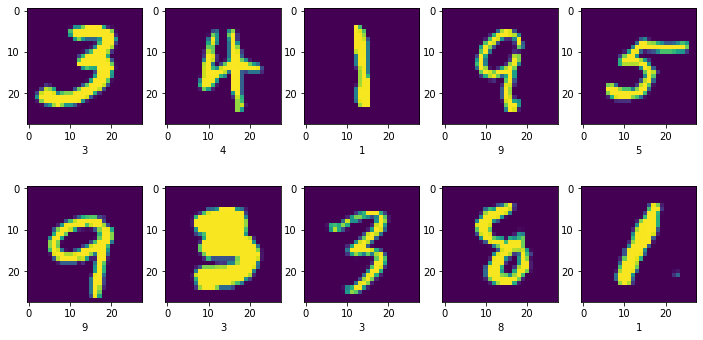

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_train[i])
  plt.xlabel(Y_train[i])
plt.show()


Plot statistics of the training and testing dataset  
(`x axis`: digits, `y axis`: number of samples corresponding to the digits)

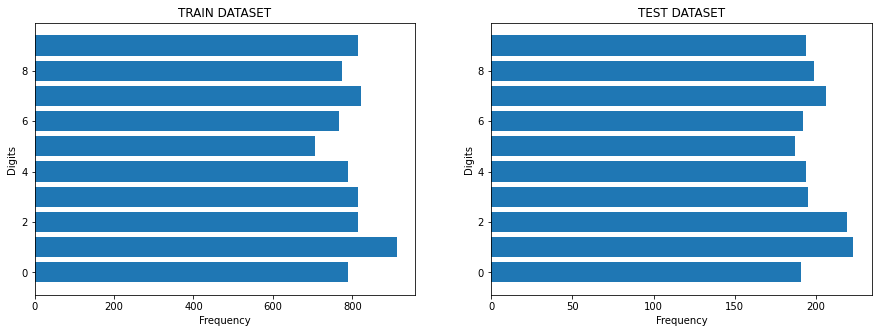

In [25]:
import numpy as np
plt.figure(figsize=(15,5))
digits,count=np.unique(Y_train,return_counts=True)
plt.subplot(1, 2, 1)
plt.barh(digits,count)
plt.ylabel('Digits')
plt.xlabel('Frequency')
plt.title('TRAIN DATASET')
digits,count=np.unique(Y_test,return_counts=True)
plt.subplot(1, 2, 2)
plt.barh(digits,count)
plt.ylabel('Digits')
plt.xlabel('Frequency')
plt.title('TEST DATASET')
plt.show()


# Your code

## Model

In [ ]:
# model building

# You are supposed to look at some CNN architectures and add convolutional layers along with MaxPooling, specifying the kernel size, pooling size, activation 


In [38]:
# Compile the model (add optimizers and metrics)
model=keras.Sequential(
    [
     layers.Conv2D(32, (3, 3), padding="same", activation="relu",input_shape=(28,28,1)),
     layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
     layers.MaxPooling2D(pool_size=(2, 2)),
     layers.Dropout(0.2),
     layers.Flatten(),
     layers.Dense(128,activation='relu'),
     layers.Dropout(0.5),
     layers.Dense(10,activation='softmax')
    ]
)

In [39]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 12544)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               1605760   
                                                      

In [40]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
history=model.fit(X_train,Y_train,epochs=20,
                 validation_split=0.2)

Epoch 1/20
200/200 [==============================] - 13s 6ms/step - loss: 0.5614 - accuracy: 0.8272 - val_loss: 0.1436 - val_accuracy: 0.9569
Epoch 2/20
200/200 [==============================] - 1s 5ms/step - loss: 0.1856 - accuracy: 0.9430 - val_loss: 0.0972 - val_accuracy: 0.9737
Epoch 3/20
200/200 [==============================] - 1s 6ms/step - loss: 0.1239 - accuracy: 0.9603 - val_loss: 0.0795 - val_accuracy: 0.9762
Epoch 4/20
200/200 [==============================] - 1s 5ms/step - loss: 0.0962 - accuracy: 0.9694 - val_loss: 0.0710 - val_accuracy: 0.9800
Epoch 5/20
200/200 [==============================] - 1s 4ms/step - loss: 0.0829 - accuracy: 0.9723 - val_loss: 0.0556 - val_accuracy: 0.9831
Epoch 6/20
200/200 [==============================] - 1s 5ms/step - loss: 0.0614 - accuracy: 0.9791 - val_loss: 0.0682 - val_accuracy: 0.9787
Epoch 7/20
200/200 [==============================] - 1s 5ms/step - loss: 0.0571 - accuracy: 0.9812 - val_loss: 0.0635 - val_accuracy: 0.9812
Epoch

## Predict some images
Print the image along with its label (true value) and predicted value.

In [50]:
#import matplotlib.pyplot as plt
pred=model.predict(X_test[:10])
pred=np.argmax(pred,axis=1)
print(pred)

[4 7 2 6 2 0 3 7 4 9]


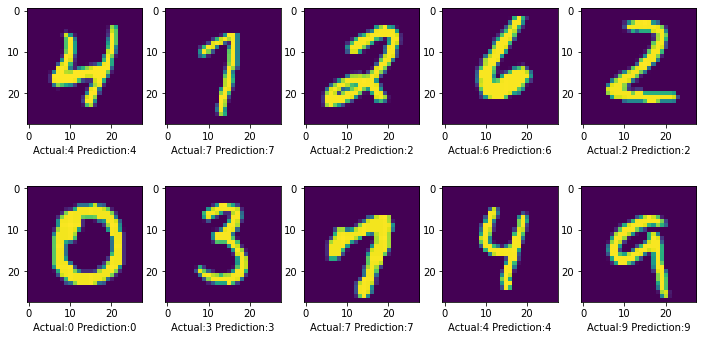

In [54]:
plt.figure(figsize=(12,6))
for i in range(10):
    plt.subplot(2,5,i+1)    
    plt.imshow(X_test[i])
    plt.xlabel(f"Actual:{Y_test[i]} Prediction:{pred[i]}")